_Lambda School Data Science_

# Regression Sprint Challenge

For this Sprint Challenge, you'll predict the price of used cars. 

The dataset is real-world. It was collected from advertisements of cars for sale in the Ukraine in 2016.

The following import statements have been provided for you, and should be sufficient. But you may not need to use every import. And you are permitted to make additional imports.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

[The dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv) contains 8,495 rows and 9 variables:

- make: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel
- registration: whether car registered in Ukraine or not
- year: year of production
- drive: drive type

Run this cell to read the data:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(10)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
3208,56,6950.0,3,53,1.4,3,1,2006,0
7240,80,4800.0,3,74,1.5,1,1,2011,0
1568,77,11900.0,2,112,2.0,0,1,2011,0
5400,49,1700.0,1,1,1.3,3,1,1986,0
2702,30,12100.0,1,95,1.8,3,1,2010,0
3347,70,8700.0,4,175,2.0,1,1,2004,1
2869,33,6600.0,3,82,1.4,3,1,2006,0
4110,76,4450.0,3,138,1.6,1,1,2011,0
2424,4,19990.0,3,127,2.8,3,1,2010,1
7250,57,9300.0,2,135,2.0,3,1,2005,0


# Predictive Modeling with Linear Regression

## 1.1 Split the data into an X matrix and y vector (`price` is the target we want to predict).

In [3]:
X = df.drop(columns='price')
y = df['price']


## 1.2 Split the data into test and train sets, using `train_test_split`.
You may use a train size of 80% and a test size of 20%.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(6796, 8) (1699, 8) (6796,) (1699,)


## 1.3 Use scikit-learn to fit a multiple regression model, using your training data.
Use `year` and one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

In [5]:
X = X_train[['body', 'drive', 'year']]
y = y_train

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficients for the fitted model.

In [6]:
model.coef_, model.intercept_

(array([-2166.27737919,  8679.91539624,  1458.7399383 ]), -2910978.518437457)

## 1.5 Use the test data to make predictions.

In [7]:
model.predict([[2, 212, 2012]])
print(model.predict(X))
#print(y.tolist())

[26851.19306384 11672.44553002 20381.22010331 ... 26851.19306384
 10213.70559173 11672.44553002]


## 1.6 Use the test data to get both the Root Mean Square Error and $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [8]:
print(' RMS Error : ',np.sqrt(mean_squared_error(y, model.predict(X))))
print(' R2 error : ', r2_score(y, model.predict(X)))

 RMS Error :  20822.19433872543
 R2 error :  0.25938873381902916


## 1.7 How should we interpret the coefficient corresponding to the `year` feature?
One sentence can be sufficient

There is a positive correlation to the year, and the price, the higher the number the better the price.

## 1.8 How should we interpret the Root Mean Square Error?
One sentence can be sufficient

We interpret the RMS error of 20822 to be a high error and the car prices are not well represented by this model.

## 1.9 How should we interpret the $R^2$?
One sentence can be sufficient

We can interpret the R Squared Error, as our model only explains about 26% of the variation in prices.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [9]:
df['logprice'] = np.log2(df['price'])

In [10]:
df.columns

Index(['make', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'logprice'],
      dtype='object')

## 2.2 Visualize scatterplots of the relationship between each feature versus the log of price, to look for non-linearly distributed features.
You may use any plotting tools and techniques.

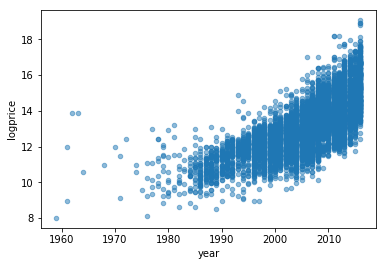

In [11]:
ax = df.plot(x='year', y='logprice', kind='scatter', alpha=0.5)


## 2.3 Create polynomial feature(s)
You will not be evaluated on which feature(s) you choose. But try to choose appropriate features.

In [12]:
df['yearsquared'] = df['year'] ** 2

In [29]:
df = df.sort_values('year')

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

R^2 0.5188536731135065
[ 3.02344072e-03 -1.19628603e+01] 11844.088236583617
 RMS Error :  0.9624650764743868
 R2 error :  0.5188536731135065


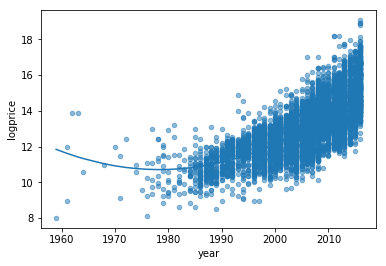

In [37]:
X = df[['yearsquared', 'year']]
y = df['logprice']
model = LinearRegression()
model.fit(X, y)
ax = df.plot(x='year', y='logprice', kind='scatter', alpha=0.5)
ax.plot(X['year'], model.predict(X))
print('R^2', model.score(X, y))

print(model.coef_, model.intercept_)

print(' RMS Error : ',np.sqrt(mean_squared_error(y, model.predict(X))))
print(' R2 error : ', r2_score(y, model.predict(X)))

## 2.5 How do we interpret coefficients in Log-Linear Regression (differently than Ordinary Least Squares Regression)?
One sentence can be sufficient

Instead of the coefficients being one to each variable, they are to the variable squared.

# Decision Trees

## 3.1 Use scikit-learn to fit a decision tree regression model, using your training data.
Use one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

You may use the log-transformed target or the original un-transformed target. You will not be evaluated on which you choose.

In [14]:
tree = DecisionTreeRegressor(max_depth=8)
tree.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## 3.2 Use the test data to get the $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [15]:
print('Train R^2 score:', tree.score(X_train, y_train))
print('Test R^2 score:', tree.score(X_test, y_test))

Train R^2 score: 0.9502412643564527
Test R^2 score: 0.8210588172366486


# Regression Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [16]:
model = sm.OLS(df['price'], sm.add_constant(df[['yearsquared']]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     1564.
Date:                Fri, 03 May 2019   Prob (F-statistic):          3.49e-314
Time:                        11:22:09   Log-Likelihood:                -97172.
No. Observations:                8495   AIC:                         1.943e+05
Df Residuals:                    8493   BIC:                         1.944e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.384e+06   3.54e+04    -39.094      

/home/jmurphy/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [17]:
model = sm.OLS(df['logprice'], sm.add_constant(df[['year', 'body', 'drive']]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     4686.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        11:22:09   Log-Likelihood:                -10688.
No. Observations:                8495   AIC:                         2.138e+04
Df Residuals:                    8491   BIC:                         2.141e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -278.4593      2.770   -100.540      0.0

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. 

### Do we have multicollinearity problems?
One sentence can be sufficient

In [18]:
X = sm.add_constant(df[['year','body', 'drive']])
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

const    89837.025386
year         1.067069
body         1.064350
drive        1.069735
dtype: float64

As we have no numbers reporting over 10, we do not have any colinearity problems with the data.